Question 1 Repeat chart 3

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [5]:
df = pd.read_csv('Music Sales.csv', index_col=None)

In [6]:
df2 = df.groupby(['Country','Region'])['Sales'].sum().reset_index()

In [7]:
sum_sales = df2["Sales"].sum()
df2["Sales_perc"] = df2["Sales"] * 100. / sum_sales
df2.sort_values(by=['Region','Sales'], ascending=False, inplace=True)
df2

,Country,Region,Sales,Sales_perc
4,Brazil,South America,523.78,7.895197
6,Chile,South America,132.92,2.003569
0,Argentina,South America,109.89,1.656427
1,Australia,Oceania,73.26,1.104284
22,USA,North America,1527.50,23.024769
5,Canada,North America,851.46,12.834481
10,France,Europe,562.50,8.478843
11,Germany,Europe,421.88,6.359207
23,United Kingdom,Europe,301.95,4.551443
7,Czech Republic,Europe,269.72,4.065624


In [8]:
r = df2['Region'].tolist()
s = df2['Sales_perc'].tolist()
c = df2['Country'].tolist()
assert len(r) == len(s)
labels = []
for i in range(len(r)):
    labels.append("%s-%s\n %.2f" %(r[i], c[i], s[i]) +"%")


In [11]:
import matplotlib

cmaps = [matplotlib.cm.Blues, matplotlib.cm.Oranges, matplotlib.cm.Greens,  matplotlib.cm.Greys, matplotlib.cm.Purples, ]*10
region2cmap = {}
region2max = {}
region2min = {}
for i in range(len(r)):
    if r[i] not in region2cmap:
        region2cmap[r[i]] = cmaps[i % len(cmaps)]
    if r[i] not in region2max:
        region2max[r[i]] = s[i]
    if r[i] not in region2min:
        region2min[r[i]] = s[i]
    if s[i]<region2min[r[i]]:
        region2min[r[i]] = s[i]
    if s[i]>region2max[r[i]]:
        region2max[r[i]] = s[i]
    
region2norm = {}
for k in region2cmap.keys():
    region2norm[k] = matplotlib.colors.Normalize(vmin=region2min[k]*0.8, vmax=region2max[k]*1.2)

colors = []
for i in range(len(r)):
    colors.append(region2cmap[r[i]](region2norm[r[i]](s[i])))

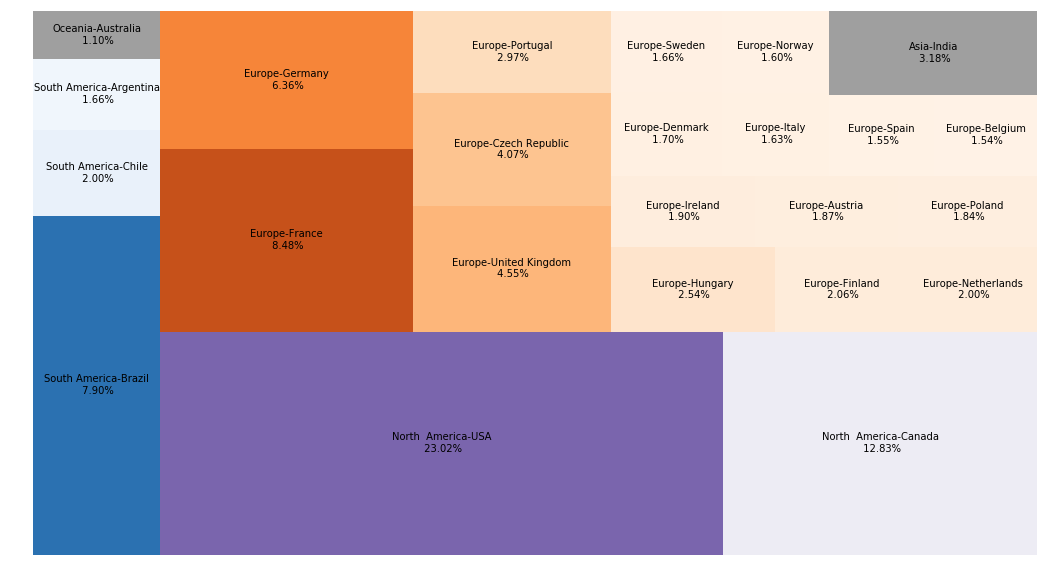

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify # pip install squarify (algorithm for treemap)&lt;/pre&gt;

plt.figure(figsize=(18,10))
# Change color
squarify.plot(sizes=s, label=labels, color=colors, alpha=0.9 )
plt.axis('off')

plt.show()


Question 2 Define own question and chart to answer it 

I want to research on: Which artist is most popular in each continent? The definition of popular is determined by the sales aggregation. 

In [13]:
df_artist=df[['Artist','Sales','Region']]
df_artist.head()

,Artist,Sales,Region
0,Accept,3.96,Europe
1,Accept,3.96,Europe
2,AC/DC,0.99,Europe
3,AC/DC,1.98,Europe
4,AC/DC,1.98,Europe


In [14]:
df3=df_artist.groupby(['Region','Artist','Sales']).sum().reset_index()
df3.head()

,Region,Artist,Sales
0,Asia,Battlestar Galactica (Classic),3.98
1,Asia,Bruce Dickinson,3.96
2,Asia,Bruce Dickinson,4.95
3,Asia,Chico Buarque,1.98
4,Asia,Chico Buarque,4.95


In [16]:
df4=df3.groupby('Region')['Sales'].aggregate(['max'])
df4

,max
Region,
Asia,4.95
Europe,9.95
North America,9.95
Oceania,4.95
South America,9.95


In [24]:
df5=pd.merge(df4,df3,left_on=['Region','max'],right_on=['Region','Sales'],how='left')
df5=df5[['Region','Artist','Sales']]
df5

,Region,Artist,Sales
0,Asia,Bruce Dickinson,4.95
1,Asia,Chico Buarque,4.95
2,Asia,Deep Purple,4.95
3,Asia,Djavan,4.95
4,Asia,Iron Maiden,4.95
5,Asia,Kiss,4.95
6,Asia,R.E.M.,4.95
7,Asia,"Terry Bozzio, Tony Levin & Steve Stevens",4.95
8,Asia,The Black Crowes,4.95
9,Asia,The Clash,4.95


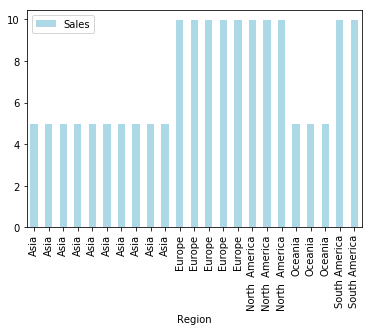

In [30]:
df5.plot(kind='bar',x='Region',y='Sales',color='lightblue')